# Gradinet Boosting Regression on MCR & MT Data

11 - 04 - 2023 | Best MAPE = 5.09

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
file = r'/content/drive/MyDrive/Colab/gbr-mcr/dataset.csv'

Data

In [36]:
import pandas as pd
import numpy as np

df = pd.read_csv(file)
# dataset
dataset = df.values
X = dataset[:, 6] # mt column
print(len(X))
Y = dataset[:, 5] # mcr column
print(len(Y))

179996
179996


Scatter

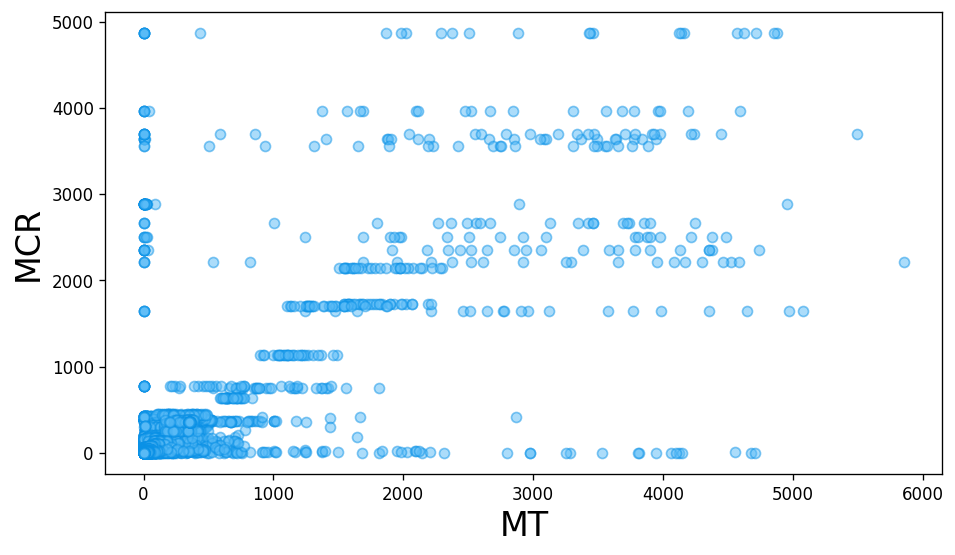

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 5), dpi=120)
plt.scatter(x=X, y=Y, color="#59bbf7", marker="o",alpha=0.5, edgecolors="#0991e6")
plt.ylabel('MCR', fontsize=20)
plt.xlabel('MT', fontsize=20)
plt.show()

Reshape + Split

In [38]:
X = X.reshape(-1, 1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

Model

In [39]:
from sklearn.ensemble import GradientBoostingRegressor

# model
gbr = GradientBoostingRegressor(subsample=0.8,
                                learning_rate=0.02,
                                n_estimators=300,
                                max_depth=8,
                                min_samples_split=200, 
                                min_samples_leaf=40,
                                loss="absolute_error")

Model Evaluation

In [40]:
from sklearn.model_selection import GridSearchCV
# The results of this grid search have been used in the gbr model.
'''
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [100, 200, 300],
    'min_samples_leaf': [20, 40, 60]
}

grid_search = GridSearchCV(gbr, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, Y_train)
print(grid.best_params_)
'''

"\nparam_grid = {\n    'learning_rate': [0.01, 0.05, 0.1],\n    'n_estimators': [50, 100, 200],\n    'max_depth': [3, 5, 7],\n    'min_samples_split': [100, 200, 300],\n    'min_samples_leaf': [20, 40, 60]\n}\n\ngrid_search = GridSearchCV(gbr, param_grid, cv=5, n_jobs=-1, verbose=1)\ngrid_search.fit(X_train, Y_train)\nprint(grid.best_params_)\n"

Fit + Predict

In [41]:
# fit
gbr.fit(X_train, Y_train)

# prediction
Y_predict = gbr.predict(X_test)

Errors

In [42]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
mae = mean_absolute_error(Y_test, Y_predict)
mape = mean_absolute_percentage_error(Y_test, Y_predict)
print("MAPE : ", mape)
print("MAE : ", mae)

MAPE :  5.09043594001105
MAE :  9.174336610306991


Plot

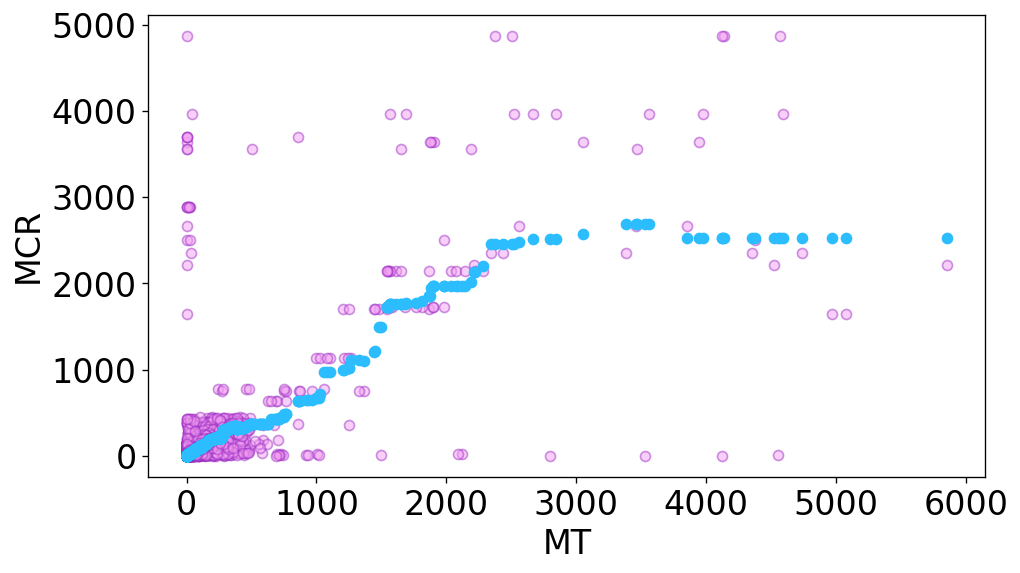

In [43]:
plt.figure(figsize=(9, 5), dpi=120)
plt.scatter(x=X_test, y=Y_test, color="#F3A0F2", marker="o",alpha=0.5, edgecolors="#9D2EC5")
plt.subplot().tick_params(labelsize=20)
plt.scatter(x=X_test, y=Y_predict, color="#2CBDFE", linewidth=1)
plt.ylabel('MCR', fontsize=20)
plt.xlabel('MT', fontsize=20)
plt.show()

Graph

24.953959353411005    27.959242534987467


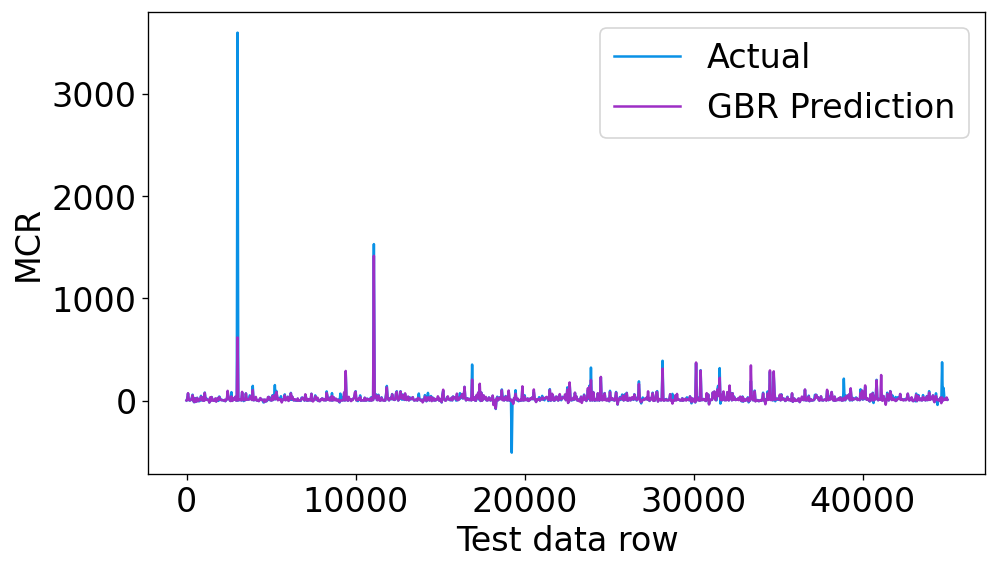

In [44]:
print(np.mean(Y_predict), "  ", np.mean(Y_test))
from scipy.interpolate import make_interp_spline

plt.figure(figsize=(9, 5), dpi=120)
X_Y_Spline = make_interp_spline(np.arange(44999), Y_test)
# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(np.arange(44999).min(), np.arange(44999).max(), 1000)
Y_ = X_Y_Spline(X_)
 
plt.plot(X_,Y_, label='Actual',color="#0991e6")
X_Y_Spline = make_interp_spline(np.arange(44999), Y_predict)
X_ = np.linspace(np.arange(44999).min(), np.arange(44999).max(), 1000)
Y_ = X_Y_Spline(X_)
plt.plot(X_,Y_,  label='GBR Prediction', color="#9D2EC5")
plt.subplot().tick_params(labelsize=20)
plt.ylabel('MCR', fontsize=20)
plt.xlabel('Test data row', fontsize=20)
plt.legend(fontsize=20)
plt.show()